In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv"
my_df = pd.read_csv(url)
my_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
dir(my_df)

In [19]:
inputs = my_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Survived'], axis='columns')
target = my_df['Survived']

inputs.shape, target.shape

((891, 4), (891,))

In [20]:
# The inputs dataframe consists a column called "Sex" which is not in numerical form.
# Converting str to int using labelencoder
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()
inputs['Sex'] = le_Sex.fit_transform(inputs['Sex'])
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [23]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean' (or 'median' or 'most_frequent')
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the input data
inputs = imputer.fit_transform(inputs)
inputs.shape, target.shape

((891, 4), (891,))

In [24]:
# Splitting the datasets into train and test datasets
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training sets: ", inputs_train.shape, target_train.shape)
print("Testing sets: ", inputs_test.shape, target_test.shape)

Training sets:  (712, 4) (712,)
Testing sets:  (179, 4) (179,)


In [25]:
# Build the model
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [26]:
# Training the model using the training data
model.fit(inputs_train, target_train)

DecisionTreeClassifier()

In [27]:
print("Model prediction score: ", model.score(inputs_test, target_test))

Model prediction score:  0.7486033519553073


In [29]:
# Getting predicted values from the model using testing dataset
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((179,), (179,))

Model accuracy score:  0.7486033519553073
Model precision score:  0.6440677966101694
Model f1 score:  0.628099173553719
Model recall score:  0.6129032258064516
Model roc-auc score:  0.716708023159636
Model confusion matrix:  [[96 21]
 [24 38]]


Text(33.22222222222222, 0.5, 'Predicted')

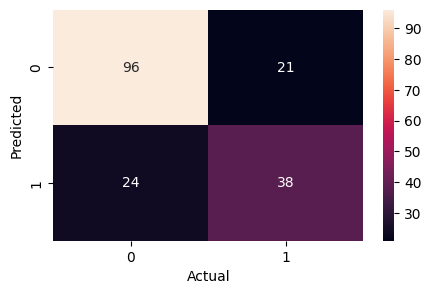

In [30]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred))
print("Model f1 score: ", f1_score(target_test, target_pred))
print("Model recall score: ", recall_score(target_test, target_pred))
print("Model roc-auc score: ", roc_auc_score(target_test, target_pred))
print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")